<!--NAVIGATION-->
# < [Autograd](2-Autograd.ipynb) | Regression | [Digit-Classification-MLP](4-MLP-Digit-Classification.ipynb)>

The main file is forked from dvgodoy/PyTorchStepByStep
### Deep Learning with PyTorch Step-by-Step: A Beginner's Guide

<div dir="rtl">

## الگوریتم گرادیان کاهشی، مورد استفاده در آموزش شبکه‌های عصبی

برای جزییات بیشتر، مقاله زیر را ملاحظه فرمایید:
<br>
							امین‌طوسی، محمود (۱۳۹۹)،
							<a href="https://math-sci.ui.ac.ir/article_25351.html">
								کاربرد بسط تیلور در کاهش حجم شبکه‌های عصبی پیچشی برای طبقه‌بندی نقاشی‌های سبک
								امپرسیونیسم و مینیاتور.
							</a>
							نشریه ریاضی و جامعه،‌ ۵ (۱)،‌ ۱-۱۶.
</div>							 

## Regression

In [36]:
import numpy as np
from sklearn.model_selection import train_test_split
# This is needed to render the plots
from plots.utils import *
import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings(action='once')

# Visualizing Gradient Descent

## Model

$$
\Large y = b + w x + \epsilon
$$

## Data Generation

### Synthetic Data Generation

In [37]:
true_b = 1
true_w = 2
N = 100

# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = (.1 * np.random.randn(N, 1))
y = true_b + true_w * x + epsilon

### Train-Validation-Test Split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [39]:
x_train.shape, y_train.shape

((80, 1), (80, 1))

(<Figure size 864x432 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Generated Data - Train'}, xlabel='x', ylabel='y'>,
        <AxesSubplot:title={'center':'Generated Data - Test'}, xlabel='x', ylabel='y'>],
       dtype=object))

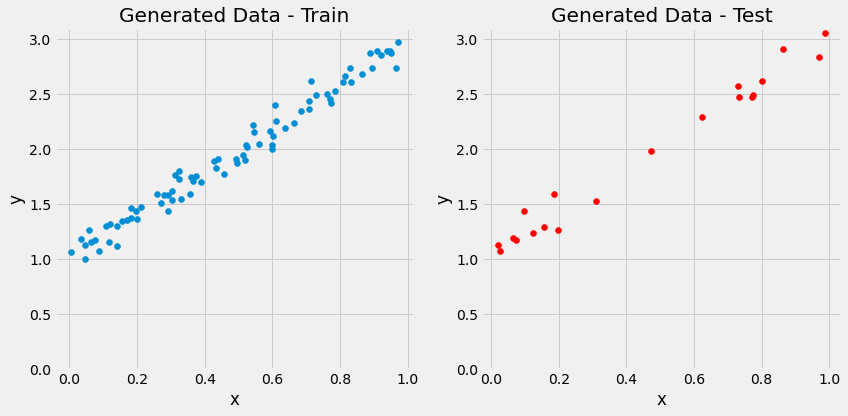

In [41]:
figure1(x_train, y_train, x_test, y_test)

## Step 0: Random Initialization

In [42]:
# Step 0 - Initializes parameters "b" and "w" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

[0.49671415] [-0.1382643]


## Step 1: Compute Model's Predictions

In [43]:
# Step 1 - Computes our model's predicted output - forward pass
y_hat = b + w * x_train

(<Figure size 432x432 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

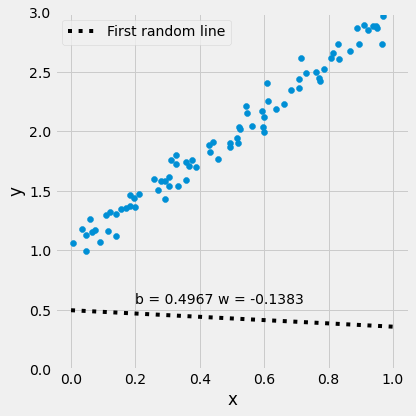

In [44]:
figure2(x_train, y_train, b, w)

## Step 2: Compute the Loss

$$
\Large error_i = \hat{y_i} - y_i
$$

[2.36596945] [0.39881299]


(<Figure size 432x432 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

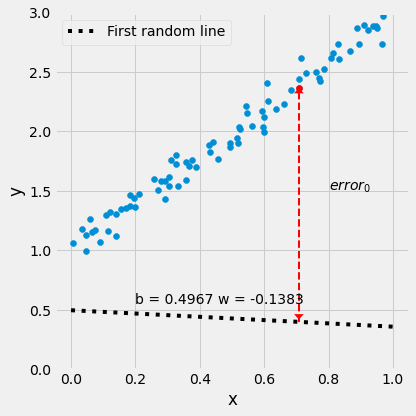

In [45]:
print(y_train[0], y_hat[0])
figure3(x_train, y_train, b, w)

$$
\Large
\begin{aligned}
MSE &= \frac{1}{n} \sum_{i=1}^n{error_i}^2
\\
&= \frac{1}{n} \sum_{i=1}^n{(\hat{y_i} - y_i)}^2
\\
&= \frac{1}{n} \sum_{i=1}^n{(b + w x_i - y_i)}^2
\end{aligned}
$$

In [46]:
# Step 2 - Computing the loss
# We are using ALL data points, so this is BATCH gradient
# descent. How wrong is our model? That's the error!
error = (y_hat - y_train)

# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()
print(loss)

2.6401126993616817


### Loss Surface

In [47]:
bs, ws, all_losses = mesh_losses(true_b, true_w, x_train, y_train)

(<Figure size 864x432 with 2 Axes>,
 (<Axes3DSubplot:title={'center':'Loss Surface'}, xlabel='b', ylabel='w'>,
  <AxesSubplot:title={'center':'Loss Surface'}, xlabel='b', ylabel='w'>))

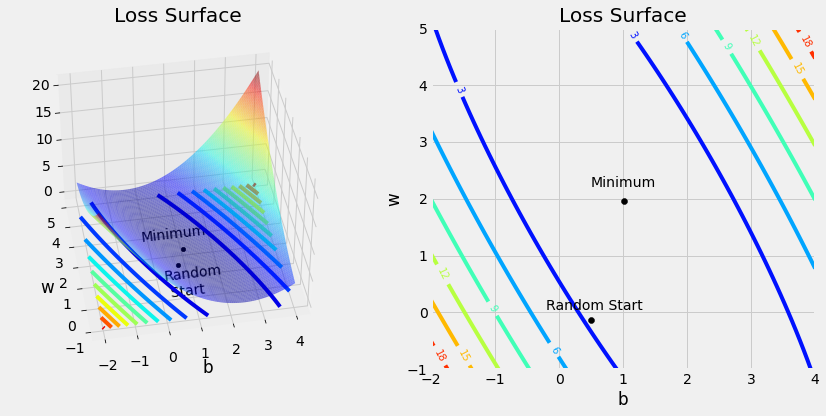

In [48]:
figure4(x_train, y_train, b, w, bs, ws, all_losses)

## Step 3: Compute the Gradients

$$
\large
\begin{aligned}
\frac{\partial{MSE}}{\partial{b}} = \frac{\partial{MSE}}{\partial{\hat{y_i}}} \cdot \frac{\partial{\hat{y_i}}}{\partial{b}} &= \frac{1}{n} \sum_{i=1}^n{2(b + w x_i - y_i)} 
\\
&= 2 \frac{1}{n} \sum_{i=1}^n{(\hat{y_i} - y_i)}
\\
\frac{\partial{MSE}}{\partial{w}} = \frac{\partial{MSE}}{\partial{\hat{y_i}}} \cdot \frac{\partial{\hat{y_i}}}{\partial{w}} &= \frac{1}{n} \sum_{i=1}^n{2(b + w x_i - y_i) \cdot x_i} 
\\
&= 2 \frac{1}{n} \sum_{i=1}^n{x_i (\hat{y_i} - y_i)}
\end{aligned}
$$

In [49]:
# Step 3 - Computes gradients for both "b" and "w" parameters
b_grad = 2 * error.mean()
w_grad = 2 * (x_train * error).mean()
print(b_grad, w_grad)

-3.0224384959608583 -1.7706733515907813


### Visualizing the Gradients
For more details about gradient descent see github: dvgodoy/PyTorchStepByStep

### Backpropagation

## Step 4: Update the Parameters

$$
\Large
\begin{aligned}
& b = b - \eta \frac{\partial{MSE}}{\partial{b}}
\\
& w = w - \eta \frac{\partial{MSE}}{\partial{w}}
\end{aligned}
$$

In [50]:
# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1
print(b, w)

# Step 4 - Updates parameters using gradients and the 
# learning rate
b = b - lr * b_grad
w = w - lr * w_grad

print(b, w)

[0.49671415] [-0.1382643]
[0.798958] [0.03880303]


(<Figure size 432x432 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

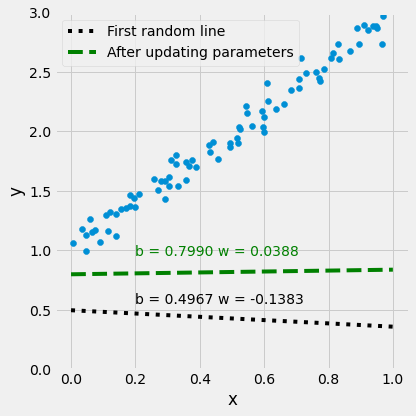

In [51]:
figure9(x_train, y_train, b, w)

## Step 5: Repeat the above updating!

In [52]:
# Initializes parameters "b" and "w" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)
lr = 0.3
num_epochs = 50
Losses = np.empty(num_epochs)
for epoch in range(num_epochs):
    y_hat = b + w * x_train
    error = (y_hat - y_train)
    loss = (error ** 2).mean()
    Losses[epoch] = loss
    b_grad = 2 * error.mean()
    w_grad = 2 * (x_train * error).mean()
    b = b - lr * b_grad
    w = w - lr * w_grad

b, w    

(array([1.11648206]), array([1.75056848]))

(<Figure size 432x432 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

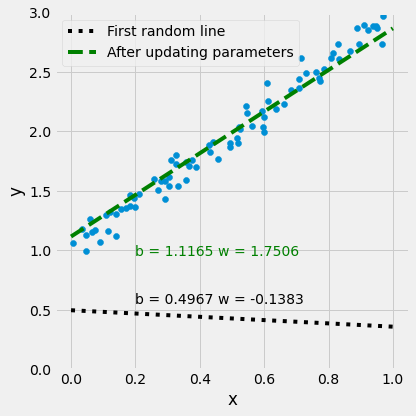

In [53]:
figure9(x_train, y_train, b, w)

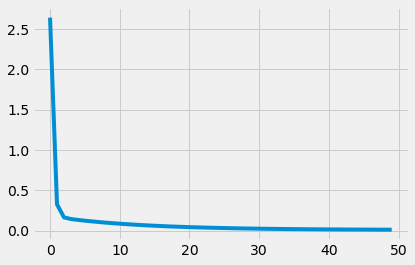

In [54]:
plt.plot(Losses)

## Using PyTorch auto grad

In [55]:
import torch
from torch import autograd
# Initializes parameters "b" and "w" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

b = torch.tensor(b, requires_grad=True)
w = torch.tensor(w, requires_grad=True)
xTrain = torch.tensor(x_train) # xTrain is a pyTorch Tensor
yTrain = torch.tensor(y_train) # yTrain is a pyTorch Tensor

In [56]:
lr = 0.3
num_epochs = 50
for epoch in range(num_epochs):
    y_hat = b + w * xTrain
    error = (y_hat - yTrain)
    loss = (error ** 2).mean()
    # محاسبه دستی مشتق را حذف کرده و به جاش مشتق خودکار را قرار می دهیم
    # b_grad = 2 * error.mean()
    # w_grad = 2 * (x_train * error).mean()
    b_grad = autograd.grad(loss, b, create_graph=True)[0]
    w_grad = autograd.grad(loss, w)[0]
    b = b - lr * b_grad.item()
    w = w - lr * w_grad.item()

b, w  

(tensor([1.1165], dtype=torch.float64, grad_fn=<SubBackward0>),
 tensor([1.7506], dtype=torch.float64, grad_fn=<SubBackward0>))

Note: Updating by the following commands is wrong:

    b -= lr * b_grad.item()
    w -= lr * w_grad.item()

(<Figure size 432x432 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

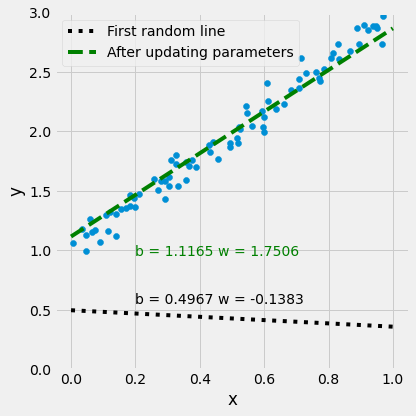

In [57]:
figure9(x_train, y_train, b, w)

In [58]:
loss

tensor(0.0109, dtype=torch.float64, grad_fn=<MeanBackward0>)

## Backward

Differntiationg using backward function

https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

In [59]:
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

b = torch.tensor(b, requires_grad=True)
w = torch.tensor(w, requires_grad=True)
xTrain = torch.tensor(x_train) # xTrain is a pyTorch Tensor
yTrain = torch.tensor(y_train) # yTrain is a pyTorch Tensor

lr = 0.3
num_epochs = 50
for epoch in range(num_epochs):
    y_hat = b + w * xTrain
    error = (y_hat - yTrain)
    loss = (error ** 2).mean()
    # محاسبه دستی مشتق را حذف کرده و به جاش مشتق خودکار را قرار می دهیم
    loss.backward()
    with torch.no_grad():
        b -= lr * b.grad
        w -= lr * w.grad
        # Manually zero the gradients after updating weights
        b.grad = None
        w.grad = None

b, w  

(tensor([1.1165], dtype=torch.float64, requires_grad=True),
 tensor([1.7506], dtype=torch.float64, requires_grad=True))

بروزرسانی به صورت قبلی زیر موجب خطا خواهد شد و تنسور جدیدی بدون گرادیان خواهیم داشت.
باید عملیات به صورت

inplace

باشد

        b = b - lr * b.grad 
        w = w - lr * w.grad


(<Figure size 432x432 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

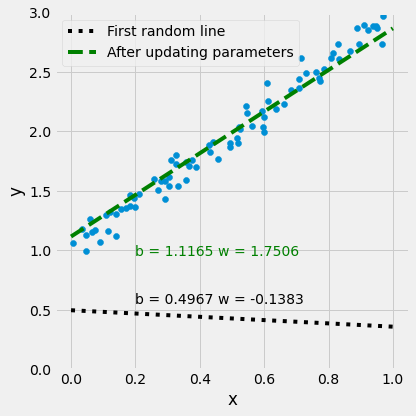

In [60]:
figure9(x_train, y_train, b, w)

# داستان ادامه دارد. موارد زیر را ببینید:
https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

PyTorch: Defining new autograd functions

PyTorch: nn module

PyTorch: optim

PyTorch: Custom nn Modules

### مدل قبلی را با ابزار شبکه‌های عصبی پای‌تورچ اجرا می‌کنیم

In [61]:
import torch
import torch.nn as nn 

# اگر از نوع دابل باشد خطا خواهیم گرفت
# x_train.dtype is float64
xTrain = torch.tensor(x_train,dtype=torch.float32)
yTrain = torch.tensor(y_train,dtype=torch.float32)

# همان مدل ساده قبلی با یک ورودی و یک خروجی، بایاس دارد
model = nn.Linear(1,1)

learning_rate = 0.3
f = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr =learning_rate )

num_epochs = 50
for epoch in range(num_epochs):
    y_hat = model(xTrain)
    loss= f(y_hat, yTrain)
    loss.backward()       #backward propagation: calculate gradients
    optimizer.step()      #update the weights
    optimizer.zero_grad() #clear out the gradients from the last step loss.backward()

(<Figure size 432x432 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

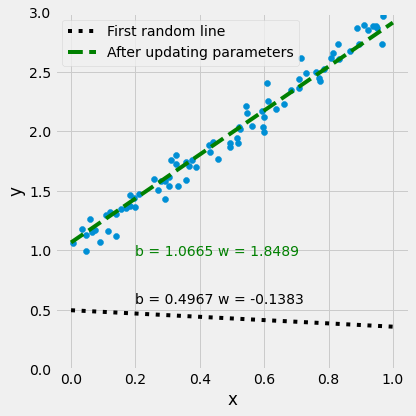

In [62]:
figure9(x_train, y_train, model.bias, model.weight[0])

به صورت مشابه می‌توان برازش انواع منحنی‌ها را داشت. به عنوان نمونه مثال و سایت زیر را ببینید:

<!--NAVIGATION-->
###  [More about optimization](App-Optimization.ipynb)

https://medium.com/@benjamin.phillips22/simple-regression-with-neural-networks-in-pytorch-313f06910379

<!--NAVIGATION-->
# < [Autograd](2-Autograd.ipynb) | Regression | [Digit-Classification-MLP](4-MLP-Digit-Classification.ipynb)>